In [1]:
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


Loading data from keras datasets

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [3]:
(train_image,train_label),(test_image,test_label)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Checking the shape of the training and testing datasets

In [4]:
train_image.shape,test_image.shape

((60000, 28, 28), (10000, 28, 28))

Name of the classes which we wil use later

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocessing

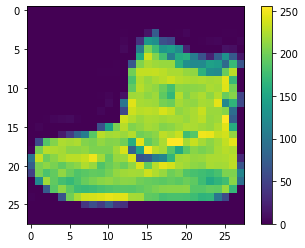

In [6]:
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.grid(False)
plt.show()

Values are from 0-255, We have to scale them betweeen 0-1 before feeding into the neural network

In [7]:
train_image= train_image/255
test_image= test_image/255

Checking if the data is in correct format. Displaying 25 images

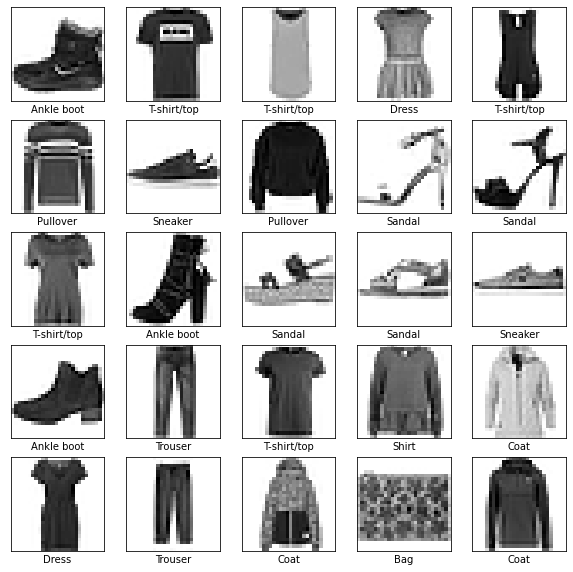

In [8]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i]])

plt.show()

## Model

In [9]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # This layer does not learn any parameters, it just flattern the input into 28*28=784 pixel
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

Model compiling

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_image,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5050 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3787 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3381 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3141 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

Accuracy evaluation

In [12]:
test_loss, test_acc = model.evaluate(test_image,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3398 - accuracy: 0.8779 - 494ms/epoch - 2ms/step

Test accuracy: 0.8779000043869019


Making predictions

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) #adding softmax layer for the predictions

In [16]:
prediction=probability_model.predict(test_image)

In [17]:
prediction[0]

array([4.2779161e-06, 4.5273447e-09, 1.4606458e-07, 5.3670521e-09,
       2.5488609e-08, 3.6313324e-03, 3.6280679e-05, 5.8371145e-03,
       3.0688935e-07, 9.9049044e-01], dtype=float32)

In [18]:
np.argmax(prediction[0])

9

Looking at the predictions 

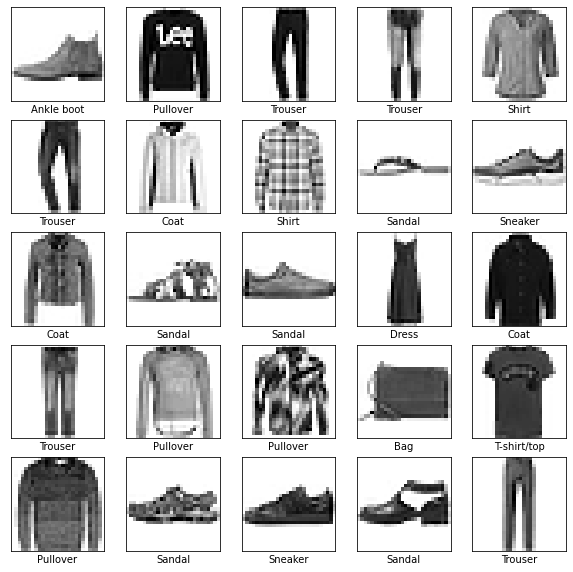

In [20]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_image[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[np.argmax(prediction[i])])

plt.show()

From the testing data

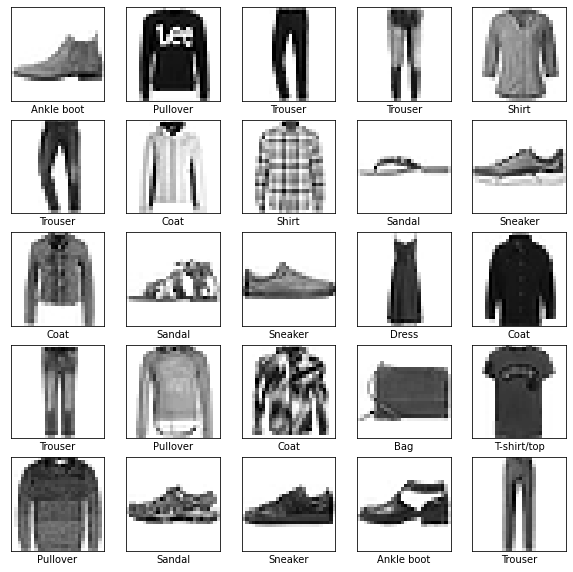

In [22]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_image[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_label[i]])

plt.show()

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [24]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

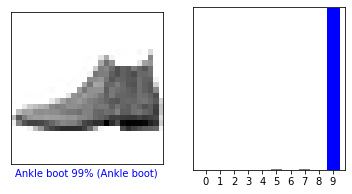

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_label)
plt.show()

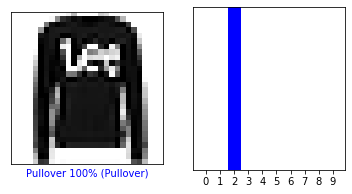

In [28]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_label)
plt.show()

Plotting first few images with correct prediction in Blue and incorrect prediction in Red

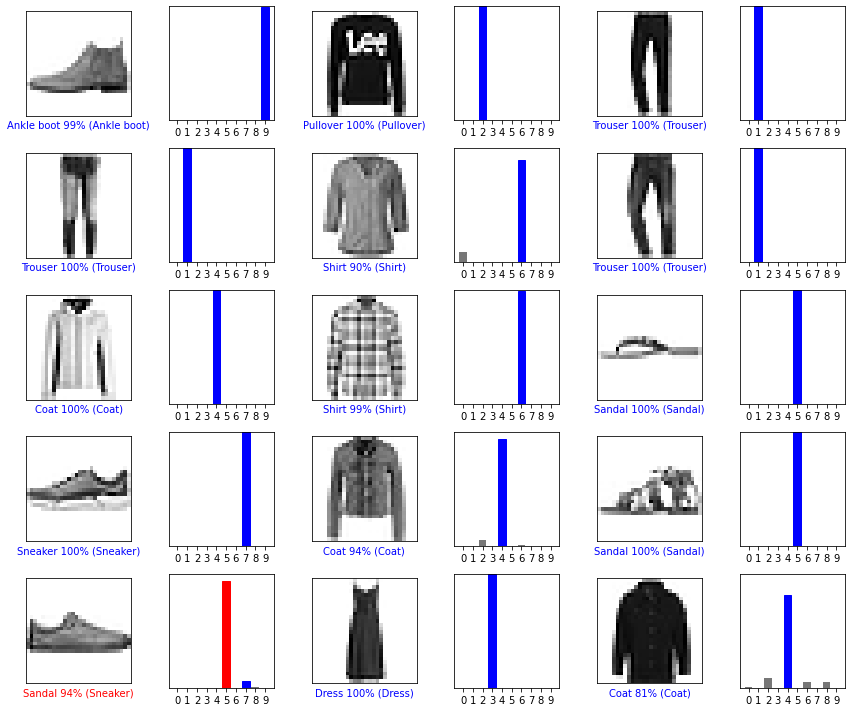

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_label, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_label)
plt.tight_layout()
plt.show()